<a href="https://colab.research.google.com/github/adithyakadukuntla/MDS_Session/blob/main/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Neccesary Libraries

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

## Loading iris dataset

In [32]:
df = pd.read_csv('/content/drive/MyDrive/DataSets/Mall_Customers.csv')

In [33]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [34]:
df.shape

(200, 5)

In [35]:
df = df.drop('CustomerID',axis=1)

In [36]:
df.Genre = df.Genre.map({"Female":0,"Male":1})

In [37]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


## Getting only data

In [38]:
X=df

In [39]:
X.shape

(200, 4)

In [40]:
X.head(3)

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6


## Standardizing the features

In [41]:
X = StandardScaler().fit_transform(X)

In [42]:
X

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

## Applying DBSCAN

In [53]:
dbscan = DBSCAN(eps=0.5,min_samples=5)

In [54]:
clusters = dbscan.fit_predict(X)

In [56]:
labels = dbscan.labels_

In [47]:
print(df.head())

   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0      1   19                  15                      39
1      1   21                  15                      81
2      0   20                  16                       6
3      0   23                  16                      77
4      0   31                  17                      40


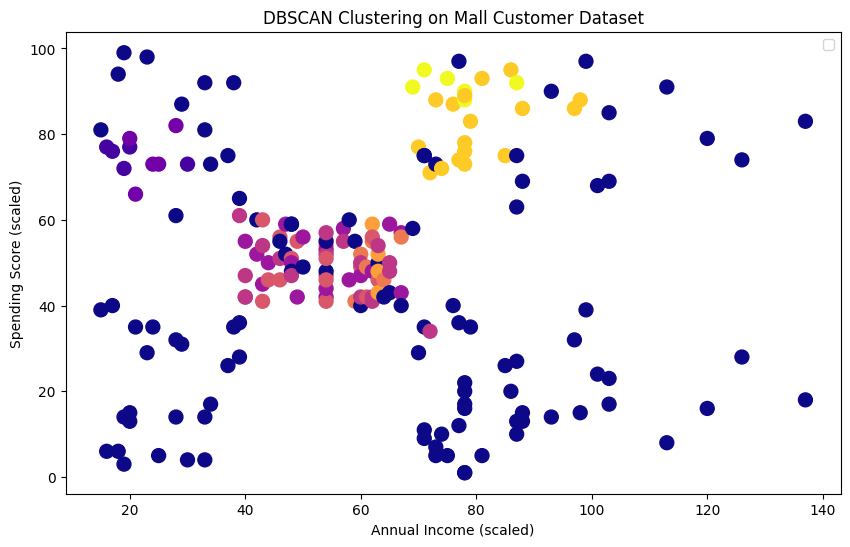

In [61]:
# Plot DBSCAN clustering results
plt.figure(figsize=(10, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=clusters, cmap='plasma', marker='o', s=100)

# Highlight noise points (label -1)
#plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=labels,  s=100)

plt.title('DBSCAN Clustering on Mall Customer Dataset')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.show()


In [62]:
import numpy as np

In [63]:
# Get the core points
core_points = dbscan.core_sample_indices_

# Get the border points
border_points = np.where((clusters != -1) & (np.isin(np.arange(len(clusters)), core_points) == False))[0]

# Get the noise points (label -1)
noise_points = np.where(clusters == -1)[0]


In [65]:
# Core points (actual data points)
core_data_points = df.iloc[core_points]

# Border points (actual data points)
border_data_points = df.iloc[border_points]

# Noise points (actual data points)
noise_data_points = df.iloc[noise_points]


In [66]:
print("Core points:")
print(core_data_points)

print("\nBorder points:")
print(border_data_points)

print("\nNoise points:")
print(noise_data_points)


Core points:
     Genre  Age  Annual Income (k$)  Spending Score (1-100)
13       0   24                  20                      77
21       1   25                  24                      73
46       0   50                  40                      55
47       0   27                  40                      47
48       0   29                  40                      42
49       0   31                  40                      42
50       0   49                  42                      52
52       0   31                  43                      54
54       0   50                  43                      45
56       0   51                  44                      50
57       1   69                  44                      46
58       0   27                  46                      51
63       0   54                  47                      59
64       1   63                  48                      51
66       0   43                  48                      50
69       0   32            

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Generate synthetic dataset similar to the image (you can tweak this for different shapes)
X, _ = make_blobs(n_samples=1500, centers=5, cluster_std=0.6, random_state=42)

# Standardize features for better clustering performance
X = StandardScaler().fit_transform(X)

# Apply KMeans Clustering
from sklearn.cluster import AgglomerativeClustering

# Apply Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=5)
hierarchical_labels = hierarchical.fit_predict(X)

# Apply DBSCAN Clustering
dbscan = DBSCAN(eps=0.3, min_samples=10)
dbscan_labels = dbscan.fit_predict(X)

# Plot the results side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

# Plot KMeans clustering
ax1.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='tab10',s=10)
ax1.set_title("K-Means Clustering")

# Plot DBSCAN clustering
ax2.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='tab10', s=10)
ax2.set_title("DBSCAN Clustering")

plt.show()


In [ ]:
!pip install scikit-learn-extra

In [ ]:
import numpy as np

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('/content/drive/MyDrive/DataSets/Mall_Customers.csv')

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
# scaling the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

km = KMedoids(n_clusters = 3,random_state=0).fit(X)


In [ ]:
df['cluster'] = km.fit_predict(X)

In [ ]:
df['cluster'] = clusters

In [ ]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['cluster'], cmap='plasma', marker='o')
plt.title('K_Medoids Clustering on Mall Customers Dataset')
plt.show()

In [ ]:
new_point = np.array([[50, 10]])
predicted_cluster = km.predict(new_point)

In [ ]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['cluster'], cmap='plasma', marker='o')
plt.title('K_Medoids Clustering on Mall Customers Dataset')

plt.scatter(new_point[0, 0], new_point[0, 1], c='red', marker='x', s=200, label=f'New Point (Cluster {predicted_cluster[0]})')

# Adding a legend to identify the new point
plt.legend()
plt.show()

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DataSets/Mall_Customers.csv')

In [ ]:
df.head()

In [ ]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [ ]:
scaler = StandardScaler()

In [ ]:
X = scaler.fit_transform(X)

In [ ]:
dbscan = DBSCAN(eps=3,min_samples=4)

In [ ]:
clusters = dbscan.fit_predict(X)

In [ ]:
df['cluster'] = clusters

In [ ]:
df.head()

In [ ]:
df['cluster'].value_counts()

In [ ]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['cluster'], cmap='plasma', marker='o')
plt.title('DBSCAN Clustering on Mall Customers Dataset')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans= KMeans(n_clusters=5, random_state=42)

In [ ]:
ctr = kmeans.fit_predict(X)

In [ ]:
ctr

In [ ]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=ctr, cmap='plasma', marker='o')
plt.title('KMEANS Clustering on Mall Customers Dataset')
plt.show()

In [ ]:
kmeans.fit(X)

In [ ]:
new_point = np.array([[50, 10]])  # For example, income and spending score values

# Predict the cluster for the new point
predicted_cluster = kmeans.predict(new_point)
print(f"The new data point {new_point} belongs to cluster: {predicted_cluster[0]}")

In [ ]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=ctr, cmap='plasma', marker='o')
plt.title('KMEANS Clustering on Mall Customers Dataset')

plt.scatter(new_point[0, 0], new_point[0, 1], c='red', marker='x', s=200, label=f'New Point (Cluster {predicted_cluster[0]})')

# Adding a legend to identify the new point
plt.legend()
plt.show()

In [ ]:
import pandas as pd

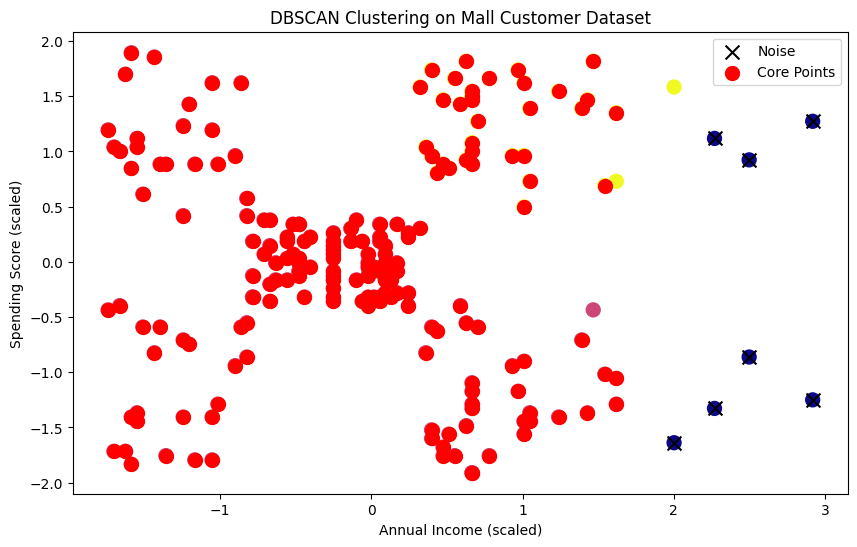

In [72]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Step 1: Load the dataset
df = pd.read_csv('/content/drive/MyDrive/DataSets/Mall_Customers.csv')

# Step 2: Select features for clustering (Annual Income and Spending Score)
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Step 3: Standard Scaling of data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply DBSCAN
db = DBSCAN(eps=0.5, min_samples=3)
clusters = db.fit_predict(X_scaled)

# Step 5: Identify Core, Border, and Noise points
core_points = db.core_sample_indices_
border_points = np.where((clusters != -1) & (np.isin(np.arange(len(clusters)), core_points) == False))[0]
noise_points = np.where(clusters == -1)[0]

# Step 6: Get the actual data points for core, border, and noise
core_data_points = df.iloc[core_points]
border_data_points = df.iloc[border_points]
noise_data_points = df.iloc[noise_points]

# # Step 7: Print the identified points
# print("Core points:")
# print(core_data_points)

# print("\nBorder points:")
# print(border_data_points)

# print("\nNoise points:")
# print(noise_data_points)

# Step 8: Plot the DBSCAN results
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='plasma', marker='o', s=100)

# Highlight noise points (label -1)
plt.scatter(X_scaled[clusters == -1, 0], X_scaled[clusters == -1, 1], c='black', marker='x', s=100, label='Noise')

# Plot the core points (highlighted in red)
plt.scatter(X_scaled[core_points, 0], X_scaled[core_points, 1], c='red', marker='o', s=100, label='Core Points')

plt.title('DBSCAN Clustering on Mall Customer Dataset')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.show()


In [ ]:
#GridSearch for this dbscan
